<a href="https://colab.research.google.com/github/zuaina/heart-disease-prediction/blob/main/heart_disease_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1763 non-null   int64  
 1   Sex     1763 non-null   int64  
 2   cp      1763 non-null   int64  
 3   BP      1763 non-null   int64  
 4   Chol    1763 non-null   float64
 5   FBS     1763 non-null   int64  
 6   ecg     1763 non-null   int64  
 7   exang   1763 non-null   int64  
 8   num     1763 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 124.1 KB
      Age  Sex  cp   BP   Chol  FBS  ecg  exang  num
0      61    1   1  134  234.0    0    0      0    1
1      64    1   1  110  211.0    0    2      1    0
2      40    1   1  140  199.0    0    0      1    0
3      59    1   1  160  273.0    0    2      0    1
4      60    0   1  150  240.0    0    0      0    0
...   ...  ...  ..  ...    ...  ...  ...    ...  ...
1758   58    1   1  100  181.4   92    0      0    1
1759   55  

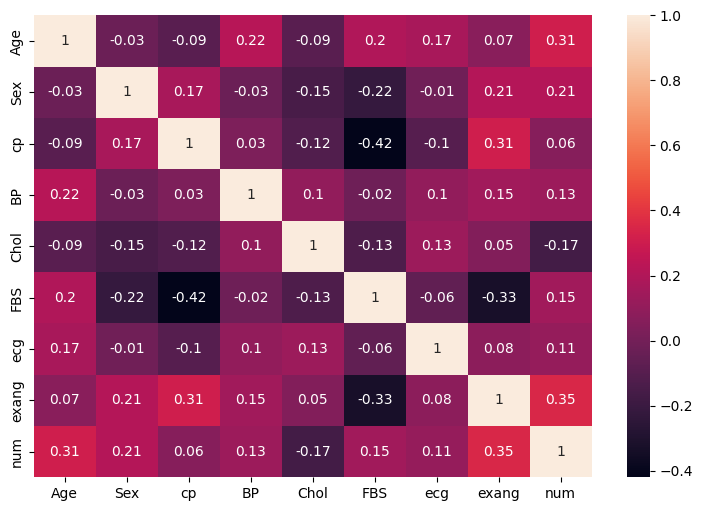

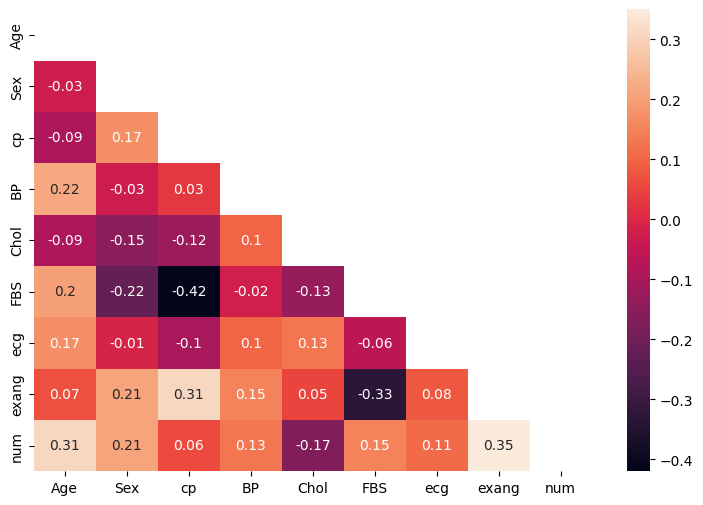

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import f1_score
# %matplotlib inline

from sklearn.model_selection import train_test_split

# importing the necessary package to use the knn algorithm
from sklearn.neighbors import KNeighborsClassifier 

# importing the necessary package to use the naive bayes algorithm
from sklearn.naive_bayes import GaussianNB 

# importing the necessary package to use the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier

# importing the necessary package to use the svm algorithm
from sklearn import svm

dataFrame=pd.read_csv('dataset_final.csv')
dataFrame
dataFrame.info()
new_dataFrame = dataFrame.fillna('null')
print(new_dataFrame)

new_dataFrame.drop_duplicates(inplace = True)
print(new_dataFrame)

# Select the columns to be normalized
columns_to_normalize = ['Age', 'BP', 'Chol']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the selected columns
new_dataFrame[columns_to_normalize] = scaler.fit_transform(new_dataFrame[columns_to_normalize])

# Print the normalized dataset
print(new_dataFrame.head())

# corr() to calculate the correlation between variables
correlation_matrix = new_dataFrame.corr().round(2)
# changing the figure size
plt.figure(figsize = (9, 6))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True);

# Steps to remove redundant values
# Return a array filled with zeros
mask = np.zeros_like(correlation_matrix)
# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True
# changing the figure size
plt.figure(figsize = (9, 6))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, mask=mask);

updated_dataFrame = new_dataFrame[["Age", "Sex", "cp", "BP", "Chol", "FBS", "ecg", "exang"]]

#seprating the target variable
y = new_dataFrame['num']

X_train, X_test, y_train, y_test = train_test_split(updated_dataFrame ,  y, test_size = 0.3, random_state = 42)
print("X_training shape: ", X_train.shape)
print("X_testing shape: ", X_test.shape)

print()

#Knn
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)
y_prediction_knn = model_knn.predict(X_test)
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)
print('K Nearest Neighbour Algorithm is {}%'.format(score_knn*100))
f1_score_knn = f1_score(y_test, y_prediction_knn, average='binary')
print('F1 Score for Knn: {}'.format(f1_score_knn))

print()
#Naive bayes 

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_prediction_nb = model_nb.predict(X_test)
score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)
print('Naive Bayes Algorithm is {}%'.format(score_nb*100))
f1_score_nb = f1_score(y_test, y_prediction_nb, average='binary')
print('F1 Score for naive bayes: {}'.format(f1_score_nb))

print()
# Decision Tree Classifier
model_dt = DecisionTreeClassifier(random_state=0)
model_dt.fit(X_train, y_train)
y_prediction_dt = model_dt.predict(X_test)
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)
print('Decision Tree Algorithm is {}%'.format(score_dt*100))
f1_score_dt = f1_score(y_test, y_prediction_dt, average='binary')
print('F1 Score for Decision Tree: {}'.format(f1_score_dt))

print()
#svm
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)
y_prediction_svm = model_svm.predict(X_test)
score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)
print('Support Vector Machine Algorithm is {}%'.format(score_svm*100))
f1_score_svm = f1_score(y_test, y_prediction_svm, average='binary')
print('F1 Score for SVM: {}'.format(f1_score_svm))